In [1]:
import pandas as pd
import numpy as np

# 모델 라이브러리 선언
from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
rawData = pd.read_csv("../lee/Python_ST_EX/dataset/feature_regression_example.csv")
rawData.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [3]:
rawData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

# 1. 타입 통합 

## 특성값 숫자컬럼변경
- 이유: 머신러닝 특성은 숫자형 지원
- 해결: Y→1, N→0 과 같이 변환

In [4]:
rawData["HO_YN"] = np.where(rawData.HOLIDAY == "Y", 1,\
                                 np.where(rawData.HOLIDAY == "N", 0, "error"))

rawData["PRO_YN"] = np.where(rawData.PROMOTION == "Y", 1,\
                                 np.where(rawData.PROMOTION == "N", 0, "error"))
rawData.head()

#함수를 만들어서 바꿀 수도 있으나 반복작업 2개이므로 생략^^(if,else구문)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [5]:
#int로 형변환 해주고 계산가능하도록
rawData["HO_YN"] = rawData["HO_YN"].astype(int)
rawData["PRO_YN"] = rawData["PRO_YN"].astype(int)

## 데이터 선택
- 이유: 2017년도 이상 데이터 관찰
- 해결: 201601~201652 데이터만 활용

In [6]:
featuresData = rawData[(rawData.YEARWEEK >= 201501) & (rawData.YEARWEEK <= 201652)]
featuresData.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [7]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
HO_YN             int32
PRO_YN            int32
dtype: object

# 2. 특성선정 / 데이터 분리

In [8]:
# 상관관계 확인
corrDf = featuresData.corr()
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [9]:
# 인덱스 컬럼 초기화
corrResult = corrDf.reset_index()
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
0,YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
1,YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
2,WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
3,QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
4,HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
5,PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
6,HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
7,PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [10]:
#상관 관계 계수 비율 선정
featuresStd = 0.5

#Feature 선택(상관관계가 높은 데이터들 뽑기)
features = corrResult[(corrResult.QTY != 1) &\
                     (abs(corrResult.QTY) > featuresStd)]["index"].tolist()
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [11]:
label = ['QTY']
label

['QTY']

In [12]:
# 데이터 분리
yearweekStd = 201630

# features = 특성, label = 답지
# 201630주차 이하인 주차와 201630주차 초과인 주차를 분리함.

# 201630주차 이하인 주차(학습할 특성)
trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
# 201630주차 이하인 주차(학습할 답지)
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]

# 201630주차 초과인 주차(검증할 특성)
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
# 201630주차 초과인 주차(검증할 답지)
# 맨뒤에 [label]이 없는 이유는 전체를 같이 보기 위해서
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

# 3. 모델 적용

### DecisionTreeRegression

In [13]:
# Define Model (모델 정의)
model_method = tree.DecisionTreeRegressor()

# Learning (Feature & Label)
# trainingData_features, trainingData_label을 인자로 던져주면 모델을 만들어줌.
# fit<< 학습시킬때 쓰는 함수, 학습할 특성과 학습할 답지 모두 인자로 던져주어야함.
model = model_method.fit(trainingData_features, trainingData_label)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### LinearRegression

In [29]:
# Define Model (모델 정의)
model_method2 = LinearRegression()

# Learning (Feature & Label)
# trainingData_features, trainingData_label을 인자로 던져주면 모델을 만들어줌.
# fit<< 학습시킬때 쓰는 함수, 학습할 특성과 학습할 답지 모두 인자로 던져주어야함.
model2 = model_method2.fit(trainingData_features, trainingData_label)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 4. 예측

In [14]:
testData_features

,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
83,4,0.280258,0,1
84,4,0.280258,0,1
85,4,0.000000,0,0
86,1,0.308584,1,1
87,1,0.308584,1,1
88,1,0.308584,1,1
89,4,0.308584,0,1
90,4,0.308584,0,1
91,4,0.280258,0,1
92,4,0.280258,0,1


### DecisionTreeRegression

In [34]:
predict = model.predict(testData_features)
predict

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       ])

### LinearRegression

In [35]:
predict2 = model2.predict(testData_features)
predict2

array([[1411.29171929],
       [1411.29171929],
       [ 300.43091536],
       [2004.96200456],
       [2004.96200456],
       [2004.96200456],
       [1586.12154967],
       [1586.12154967],
       [1411.29171929],
       [1411.29171929],
       [1799.54021119],
       [1411.29171929],
       [ 300.43091536],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2285.44087736],
       [1856.31310796],
       [1856.31310796],
       [2275.15356285]])

In [36]:
# testData_features의 수 = 배열 predict의 길이
len(predict)

22

## 5. 데이터 정리

In [37]:
testData = testData_label.reset_index(drop = True)
testData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1


In [38]:
### 데이터프레임으로 변환(DecisionTreeRegression)
predictData = pd.DataFrame(predict)

#컬럼헤더명 바꾸기
predictData.columns = ["DecisionTree Regression"]

#컬럼 인덱스를 통해서 컬럼헤더명 바꾸기
#predictData = predictData.rename(columns = {0:"PREDICT"})
predictData = predictData.reset_index(drop = True)

In [40]:
### 데이터프레임으로 변환(LinearRegression)
predictData2 = pd.DataFrame(predict2)

#컬럼헤더명 바꾸기
predictData2.columns = ["LinearRegression"]

#컬럼 인덱스를 통해서 컬럼헤더명 바꾸기
#predictData = predictData.rename(columns = {0:"PREDICT"})
predictData2 = predictData2.reset_index(drop = True)

### 데이터 프레임 합치기위한 concat 사용! 
#### **두개의 데이터프레임을 위아래로 합칠때 컬럼수와 컬럼명이 동일해야함.(axis = 0)
#### **두개의 데이터프레임을 양옆으로 합칠때 인덱스가 동일해야함.(axis=1)

In [43]:
resultData = pd.concat([testData, predictData,predictData2], axis=1)
resultData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,DecisionTree Regression,LinearRegression
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000,1411.291719
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000,1411.291719
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286,300.430915
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000,1586.121550
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000,1586.121550
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000,1411.291719
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000,1411.291719


### 데이터 프레임 합치는 두번째 방법(outerjoin을 활용)

In [20]:
#result=pd.merge(testData, predictData,left_index=True, right_index=True, how='outer')
#result

## 6. 결과 검증(regression 정확도 지표)

In [44]:
### MAE
mean_absolute_error(resultData["QTY"], resultData["DecisionTree Regression"])

402.7435064935065

In [45]:
import math

### RMSE (MSE)
math.sqrt(mean_squared_error(resultData["QTY"], resultData["DecisionTree Regression"]))

476.11553668877247

In [46]:
### R2
r2_score(resultData["QTY"], resultData["DecisionTree Regression"])

0.5144917252719985

In [47]:
### MAE
mean_absolute_error(resultData["QTY"], resultData["LinearRegression"])

566.617239476098

In [48]:
import math

### RMSE (MSE)
math.sqrt(mean_squared_error(resultData["QTY"], resultData["LinearRegression"]))

722.6052639386677

In [49]:
### R2
r2_score(resultData["QTY"], resultData["LinearRegression"])

-0.11834080332946595

## 7. 시각화

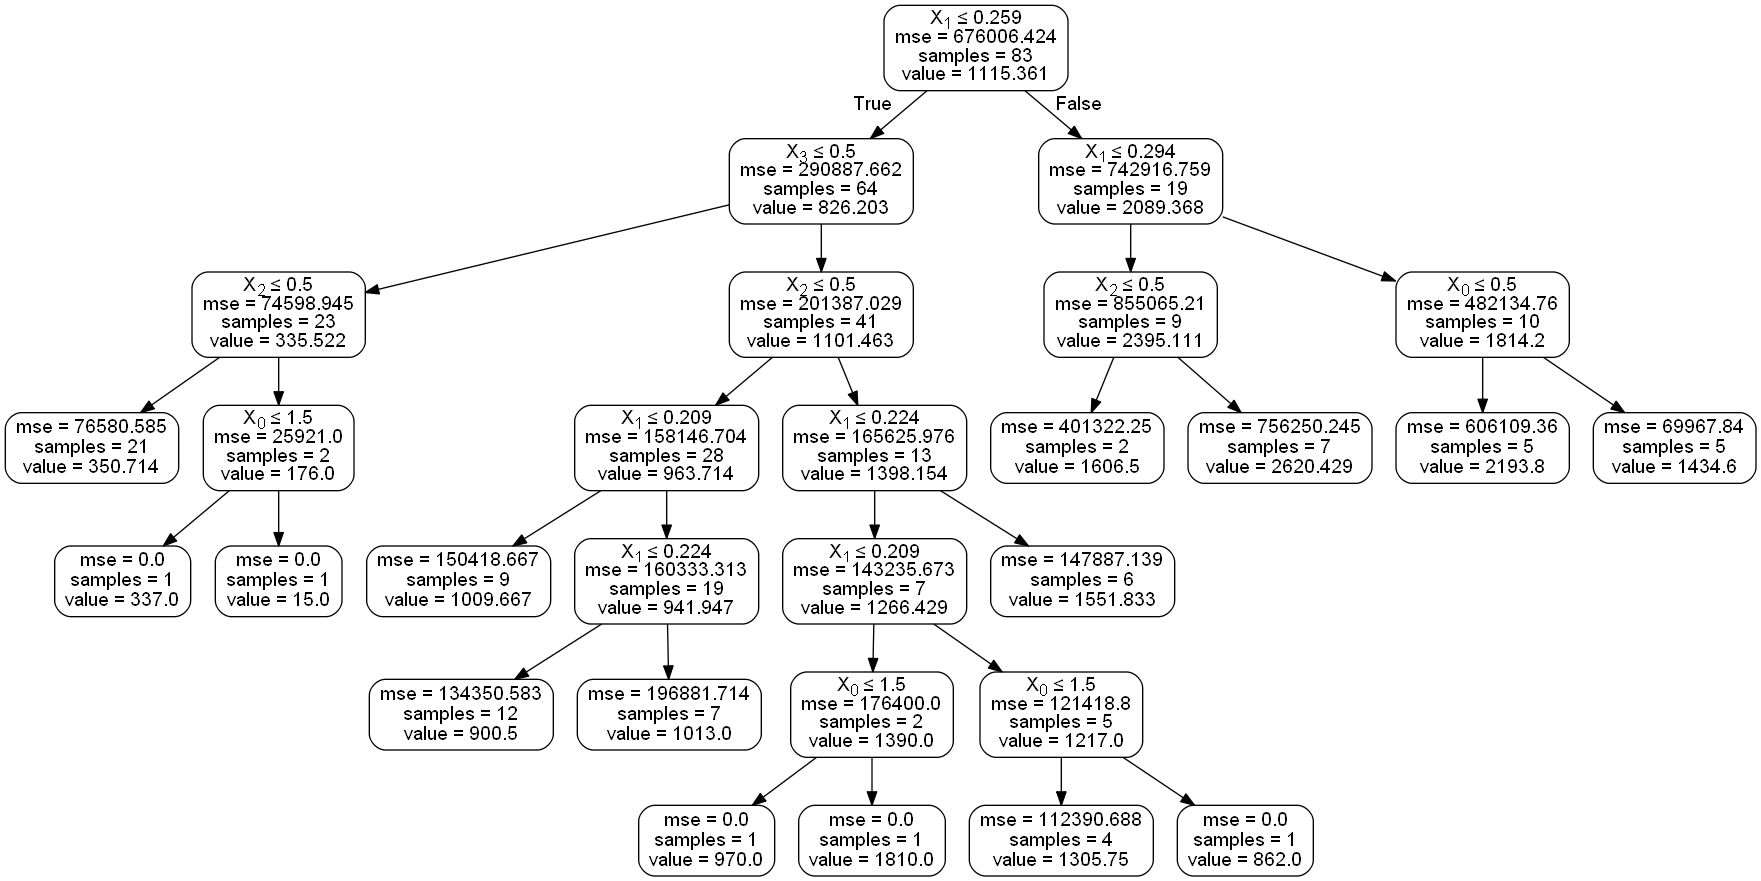

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
resultData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,DecisionTree Regression,LinearRegression
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000,1411.291719
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000,1411.291719
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286,300.430915
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000,1586.121550
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000,1586.121550
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000,1411.291719
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000,1411.291719


In [51]:
import matplotlib.pyplot as plt
import numpy as np
#차트를 만들기 위해 필요한 라이브러리

%matplotlib inline
#커맨드뷰에서 차트 시연

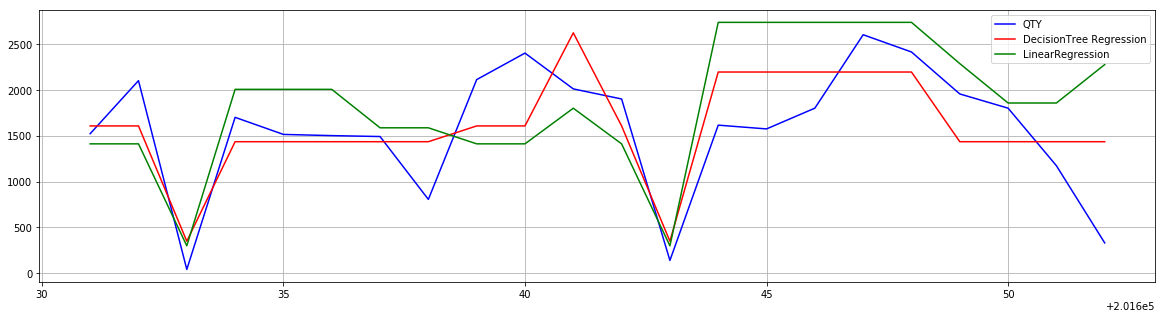

In [70]:
fig = plt.figure(figsize=(20,5))
x= resultData.YEARWEEK
y0 = resultData["QTY"]
y1 = resultData["DecisionTree Regression"]
y2 = resultData["LinearRegression"]

plt.plot(x,y0,"b-", label="QTY")
plt.plot(x,y1,"r-", label="DecisionTree Regression")
plt.plot(x,y2,"g-", label="LinearRegression")
plt.legend(loc=0) #범례를 만들어줌 (0일시 "best"옵션(빈공간))
plt.grid(True) #그리드 표기

Text(0,0.5,'value')

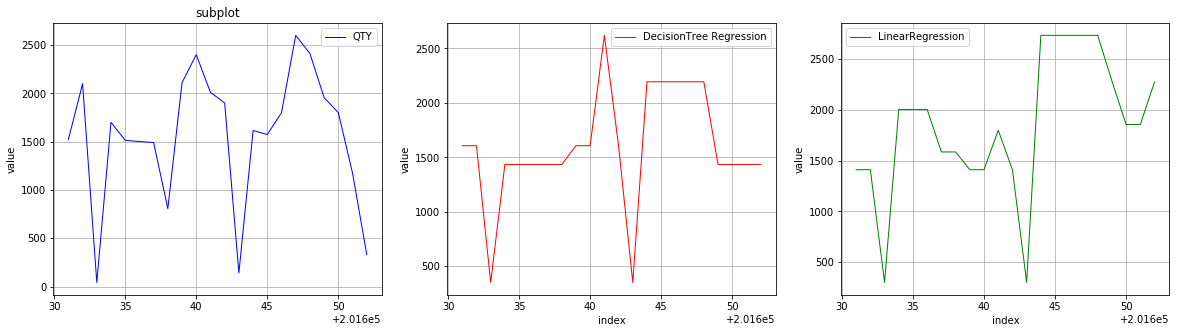

In [69]:
fig = plt.figure(figsize=(20,5)) # 도화지를 만들자! 처음에 만들고 싶은 도화지의 크기 (x,y)
ax1 = fig.add_subplot(131) # subplot(1행3렬의1번째)에 서브플롯을 만든다!
plt.plot(x,y0, 'b-', lw=1, label = 'QTY')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('value')
plt.title('subplot')

ax2 = plt.subplot(132) #subplot(1행 3렬의 2번째)에 서브플롯을 만든다!
plt.plot(x,y1, 'r-', lw=1, label='DecisionTree Regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')

ax3 = plt.subplot(133) #subplot(1행 3렬의 3번째)에 서브플롯을 만든다!
plt.plot(x,y2, 'g-', lw=1, label='LinearRegression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')